In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.api import Holt

In [2]:
class Confidence():
    def __init__(self, z, holt_z):
        self.z = z  # 2.58
        self.holt_z = holt_z # 3.219

    def confidenceInterval(self, use_INT_arr):
        return np.mean(use_INT_arr) + ( self.z * (np.std(use_INT_arr) / np.sqrt(len(use_INT_arr))) )

    def holtLower(self, fcast, se):
        return fcast - ( self.holt_z * se )

    def holtCheck(self, fcast, se):
        MIN = fcast - ( self.holt_z * se )
        MAX = fcast + ( self.holt_z * se )
        return MIN, MAX

In [3]:
class HoltTech():
    def __init__(self, level, trend):
        self.level = level
        self.trend = trend

        self.preL = 0
        self.preB = 0

    def holtForcast(self, x):
        
        if self.preL == 0:
            self.preL = x
            self.preB = 0
            return x
        
        l = (self.level * x) + (1 - self.level) * (self.preL + self.preB)
        b = self.trend * (l - self.preL) + (1 - self.trend) * self.preB

        res = l + b

        self.preL = l
        self.preB = b

        return res

In [4]:
class INT():
    def __init__(self, testCase, mini_range):
        self.use_INT_arr = []
        self.pre_time = 0
        self.fcast = 0
        self.power_sum = 0
        self.se = 0
        self.idx = 2

        self.confi = Confidence(z = 2.58, holt_z= 3.219)
        self.holt = HoltTech(level=0.1, trend=0.0001)
        self.lower = 0
        
        self.fcast_pre = 0
        self.se_pre = 0

    def full_arr(self):
        del self.use_INT_arr[:len(self.use_INT_arr) - 100]

    def check_INT(self, curr_time, test):
        if len(self.use_INT_arr) > 10000:
            self.full_arr()

        if self.pre_time == 0:
            self.pre_time = curr_time
            return False

        INT = curr_time - self.pre_time
#         print('Current INT: ', INT)
        
        if test:
            if self.lower != 0:
                if INT < self.lower:
                    self.fcast = self.fcast_pre
                    self.se = self.se_pre
                    self.power_sum -= np.power(INT - self.fcast_pre, 2)
                    self.idx -= 1
                    return True

        if len(self.use_INT_arr) < 3 and INT < 0.3:
            self.use_INT_arr.append(INT)
            self.pre_time = curr_time
            return False

        if INT < self.confi.confidenceInterval(self.use_INT_arr):
#             print('Current INT: ', INT)
            if len(self.use_INT_arr) > 10:

                if self.fcast == 0:
                    self.fcast = self.holt.holtForcast(INT)
                    self.use_INT_arr.append(INT)
                    self.pre_time = curr_time
                    return False
                
                self.power_sum += np.power(INT - self.fcast, 2)

                if self.se == 0:
                    self.se = np.sqrt(self.power_sum / ( self.idx - 1))
                    self.fcast = self.holt.holtForcast(INT)
                    self.use_INT_arr.append(INT)
                    self.pre_time = curr_time
                    self.idx += 1
                    return False

                self.fcast_pre = self.fcast
                self.se_pre = self.se

                self.fcast = self.holt.holtForcast(INT)
#                 print('fcast: ', self.fcast)
                self.lower = self.confi.holtLower(self.fcast, self.se)
                self.se = np.sqrt(self.power_sum / ( self.idx - 1))
#                 print('se: ', self.se)
                self.idx += 1
#                 print('lower: ', self.lower)
            
          
            self.use_INT_arr.append(INT)
                
        self.pre_time = curr_time
        return False

In [5]:
res = []
    
for j in range(1, 2701):
    print("Start: " + str(j))
    df = pd.read_csv('./test_data0/data' + str(j) + '.csv')

    df_time = df['time']
    df_rssi = df['rssi']
    case = 5
    mini_range = 0.3
    
    int_flag = False
    rssi_flag = False

    if len(df_time) > 95:
        case = 10
    elif len(df_time) > 495:
        case = 50
        
    if j >= 901 and j <= 1800:
        mini_range = 0.17
    elif j >= 1801 and j <= 2700:
        mini_range = 0.05

    INT_d = INT(case, mini_range)
    
    for i in range(len(df_time)):
        if i < len(df_time) - 1:
            INT_d.check_INT(df_time[i], False)
        else:
            if not int_flag:
                int_res = INT_d.check_INT(df_time[i], True)
                
                if int_res:
                    int_flag = True
                    break

    if int_flag:
        res.append(True)
    else:
        res.append(False)

Start: 1
Start: 2
Start: 3
Start: 4
Start: 5
Start: 6
Start: 7
Start: 8
Start: 9
Start: 10
Start: 11
Start: 12
Start: 13
Start: 14
Start: 15
Start: 16
Start: 17
Start: 18
Start: 19
Start: 20
Start: 21
Start: 22
Start: 23
Start: 24
Start: 25
Start: 26
Start: 27
Start: 28
Start: 29
Start: 30
Start: 31
Start: 32
Start: 33
Start: 34
Start: 35
Start: 36
Start: 37
Start: 38
Start: 39
Start: 40
Start: 41
Start: 42
Start: 43
Start: 44
Start: 45
Start: 46
Start: 47
Start: 48

C:\Users\82109\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\82109\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\82109\anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\82109\anaconda3\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
C:\Users\82109\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



Start: 49
Start: 50
Start: 51
Start: 52
Start: 53
Start: 54
Start: 55
Start: 56
Start: 57
Start: 58
Start: 59
Start: 60
Start: 61
Start: 62
Start: 63
Start: 64
Start: 65
Start: 66
Start: 67
Start: 68
Start: 69
Start: 70
Start: 71
Start: 72
Start: 73
Start: 74
Start: 75
Start: 76
Start: 77
Start: 78
Start: 79
Start: 80
Start: 81
Start: 82
Start: 83
Start: 84
Start: 85
Start: 86
Start: 87
Start: 88
Start: 89
Start: 90
Start: 91
Start: 92
Start: 93
Start: 94
Start: 95
Start: 96
Start: 97
Start: 98
Start: 99
Start: 100
Start: 101
Start: 102
Start: 103
Start: 104
Start: 105
Start: 106
Start: 107
Start: 108
Start: 109
Start: 110
Start: 111
Start: 112
Start: 113
Start: 114
Start: 115
Start: 116
Start: 117
Start: 118
Start: 119
Start: 120
Start: 121
Start: 122
Start: 123
Start: 124
Start: 125
Start: 126
Start: 127
Start: 128
Start: 129
Start: 130
Start: 131
Start: 132
Start: 133
Start: 134
Start: 135
Start: 136
Start: 137
Start: 138
Start: 139
Start: 140
Start: 141
Start: 142
Start: 143
Start

Start: 803
Start: 804
Start: 805
Start: 806
Start: 807
Start: 808
Start: 809
Start: 810
Start: 811
Start: 812
Start: 813
Start: 814
Start: 815
Start: 816
Start: 817
Start: 818
Start: 819
Start: 820
Start: 821
Start: 822
Start: 823
Start: 824
Start: 825
Start: 826
Start: 827
Start: 828
Start: 829
Start: 830
Start: 831
Start: 832
Start: 833
Start: 834
Start: 835
Start: 836
Start: 837
Start: 838
Start: 839
Start: 840
Start: 841
Start: 842
Start: 843
Start: 844
Start: 845
Start: 846
Start: 847
Start: 848
Start: 849
Start: 850
Start: 851
Start: 852
Start: 853
Start: 854
Start: 855
Start: 856
Start: 857
Start: 858
Start: 859
Start: 860
Start: 861
Start: 862
Start: 863
Start: 864
Start: 865
Start: 866
Start: 867
Start: 868
Start: 869
Start: 870
Start: 871
Start: 872
Start: 873
Start: 874
Start: 875
Start: 876
Start: 877
Start: 878
Start: 879
Start: 880
Start: 881
Start: 882
Start: 883
Start: 884
Start: 885
Start: 886
Start: 887
Start: 888
Start: 889
Start: 890
Start: 891
Start: 892
Start: 893

Start: 1505
Start: 1506
Start: 1507
Start: 1508
Start: 1509
Start: 1510
Start: 1511
Start: 1512
Start: 1513
Start: 1514
Start: 1515
Start: 1516
Start: 1517
Start: 1518
Start: 1519
Start: 1520
Start: 1521
Start: 1522
Start: 1523
Start: 1524
Start: 1525
Start: 1526
Start: 1527
Start: 1528
Start: 1529
Start: 1530
Start: 1531
Start: 1532
Start: 1533
Start: 1534
Start: 1535
Start: 1536
Start: 1537
Start: 1538
Start: 1539
Start: 1540
Start: 1541
Start: 1542
Start: 1543
Start: 1544
Start: 1545
Start: 1546
Start: 1547
Start: 1548
Start: 1549
Start: 1550
Start: 1551
Start: 1552
Start: 1553
Start: 1554
Start: 1555
Start: 1556
Start: 1557
Start: 1558
Start: 1559
Start: 1560
Start: 1561
Start: 1562
Start: 1563
Start: 1564
Start: 1565
Start: 1566
Start: 1567
Start: 1568
Start: 1569
Start: 1570
Start: 1571
Start: 1572
Start: 1573
Start: 1574
Start: 1575
Start: 1576
Start: 1577
Start: 1578
Start: 1579
Start: 1580
Start: 1581
Start: 1582
Start: 1583
Start: 1584
Start: 1585
Start: 1586
Start: 1587
Star

Start: 2190
Start: 2191
Start: 2192
Start: 2193
Start: 2194
Start: 2195
Start: 2196
Start: 2197
Start: 2198
Start: 2199
Start: 2200
Start: 2201
Start: 2202
Start: 2203
Start: 2204
Start: 2205
Start: 2206
Start: 2207
Start: 2208
Start: 2209
Start: 2210
Start: 2211
Start: 2212
Start: 2213
Start: 2214
Start: 2215
Start: 2216
Start: 2217
Start: 2218
Start: 2219
Start: 2220
Start: 2221
Start: 2222
Start: 2223
Start: 2224
Start: 2225
Start: 2226
Start: 2227
Start: 2228
Start: 2229
Start: 2230
Start: 2231
Start: 2232
Start: 2233
Start: 2234
Start: 2235
Start: 2236
Start: 2237
Start: 2238
Start: 2239
Start: 2240
Start: 2241
Start: 2242
Start: 2243
Start: 2244
Start: 2245
Start: 2246
Start: 2247
Start: 2248
Start: 2249
Start: 2250
Start: 2251
Start: 2252
Start: 2253
Start: 2254
Start: 2255
Start: 2256
Start: 2257
Start: 2258
Start: 2259
Start: 2260
Start: 2261
Start: 2262
Start: 2263
Start: 2264
Start: 2265
Start: 2266
Start: 2267
Start: 2268
Start: 2269
Start: 2270
Start: 2271
Start: 2272
Star

In [6]:
len(res)

2700

In [7]:
print((res.count(True) / len(res)) * 100)

86.03703703703704


In [8]:
case_50 = res[0:300] + res[900:1200] + res[1800:2100]
case_100 = res[300:600] + res[1200:1500] + res[2100:2400]
case_500 = res[600:900] + res[1500:1800] + res[2400:2700]

case_0 = res[0:100] + res[300:400] + res[600:700] + res[900:1000] + res[1200:1300] + res[1500:1600] + res[1800:1900] + res[2100:2200] + res[2400:2500]
case_1 = res[100:200] + res[400:500] + res[700:800] + res[1000:1100] + res[1300:1400] + res[1600:1700] + res[1900:2000] + res[2200:2300] + res[2500:2600]
case_2 = res[200:300] + res[500:600] + res[800:900] + res[1100:1200] + res[1400:1500] + res[1700:1800] + res[2000:2100] + res[2300:2400] + res[2600:2700]

case_fast = res[1800:2700]
case_normal = res[900:1800]
case_slow = res[0:900]

In [9]:
acc_50 = case_50.count(True)
acc_100 = case_100.count(True)
acc_500 = case_500.count(True)

acc_0 = case_0.count(True)
acc_1 = case_1.count(True)
acc_2 = case_2.count(True)

acc_fast = case_fast.count(True)
acc_normal = case_normal.count(True)
acc_slow = case_slow.count(True)

In [10]:
print(acc_50 / len(case_50) * 100)
print(acc_100 / len(case_100) * 100)
print(acc_500 / len(case_500) * 100)

print(acc_0 / len(case_0) * 100)
print(acc_1 / len(case_1) * 100)
print(acc_2 / len(case_2) * 100)

print(acc_fast / len(case_fast) * 100)
print(acc_normal / len(case_normal) * 100)
print(acc_slow / len(case_slow) * 100)

85.88888888888889
85.22222222222223
87.0
90.88888888888889
86.66666666666667
80.55555555555556
75.1111111111111
85.0
98.0


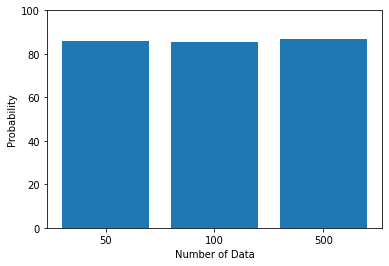

In [11]:
import matplotlib.pyplot as plt

x = np.arange(3)
testCase_num = ['50', '100', '500']
values = [(acc_50 / len(case_50)) * 100, (acc_100 / len(case_100)) * 100, (acc_500 / len(case_500)) * 100 ]

plt.bar(x, values)
plt.xticks(x, testCase_num)
plt.ylim([0, 100])
plt.xlabel('Number of Data')
plt.ylabel('Probability')

plt.show()

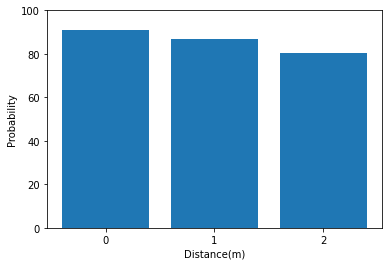

In [12]:
x = np.arange(3)
testCase_num = ['0', '1', '2']
values = [(acc_0 / len(case_0)) * 100, (acc_1 / len(case_1)) * 100, (acc_2 / len(case_2)) * 100 ]

plt.bar(x, values)
plt.xticks(x, testCase_num)
plt.ylim([0, 100])
plt.xlabel('Distance(m)')
plt.ylabel('Probability')

plt.show()

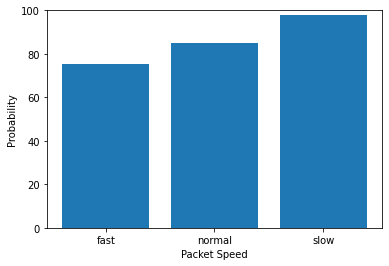

In [13]:
x = np.arange(3)
testCase_num = ['fast', 'normal', 'slow']
values = [(acc_fast / len(case_fast)) * 100, (acc_normal / len(case_normal)) * 100, (acc_slow / len(case_slow)) * 100 ]

plt.bar(x, values)
plt.xticks(x, testCase_num)
plt.ylim([0, 100])
plt.xlabel('Packet Speed')
plt.ylabel('Probability')

plt.show()